# Student Academic Performance Analysis

## Performance Prediction Part
### - using xAPI-Educational Mining Dataset

### Group 2: 
### Fangzheng Ji              Jihao Zhang                Jaleh Ghorban  
### Shahrzad Amini                 Damera Ritesh



#### Table of contents
1. Introduction of Dataset
2. Explore Dataset
3. Academic Performance Prediction
   - 3-1. Preprocessing Dataset
   - 3-2. Machine Learning using Logistic Regression
   - 3-3. Machine Learning using SVM
   - 3-4. Machine Learning using KNN
   - 3-5. Machine Learning using Random Forest 
   - 3-6. Machine Learning using XGBoost 

## 1. Introduction of the Dataset

#### Attributes

1. **Gender**: student's gender (nominal: 'Male' or 'Female’)
2. **NationalITy**: student's nationality (nominal:’ Kuwait’,’ Lebanon’,’ Egypt’,’ SaudiArabia’,’ USA’,’ Jordan’,’ Venezuela’,’ Iran’,’ Tunis’,’ Morocco’,’ Syria’,’ Palestine’,’ Iraq’,’ Lybia’)
3. **PlaceofBirth**: student's Place of birth (nominal:’ Kuwait’,’ Lebanon’,’ Egypt’,’ SaudiArabia’,’ USA’,’ Jordan’,’ Venezuela’,’ Iran’,’ Tunis’,’ Morocco’,’ Syria’,’ Palestine’,’ Iraq’,’ Lybia’)
4. **StageID**: educational level student belongs (nominal: ‘lowerlevel’,’MiddleSchool’,’HighSchool’)
5. **GradeID**: grade student belongs (nominal: ‘G-01’, ‘G-02’, ‘G-03’, ‘G-04’, ‘G-05’, ‘G-06’, ‘G-07’, ‘G-08’, ‘G-09’, ‘G-10’, ‘G-11’, ‘G-12‘)

6. **SectionID**: classroom student belongs (nominal:’A’,’B’,’C’)

7. **Topic**: course topic (nominal:’ English’,’ Spanish’, ‘French’,’ Arabic’,’ IT’,’ Math’,’ Chemistry’, ‘Biology’, ‘Science’,’ History’,’ Quran’,’ Geology’)

8. **Semester**: school year semester (nominal:’ First’,’ Second’)

9. **Relation**: parent responsible for student (nominal:’mom’,’father’)

10. **raisedhands**: how many times the student raises his/her hand on classroom (numeric:0-100)

11. **VisITedResources**: how many times the student visits a course content(numeric:0-100)

12. **AnnouncementsView**: how many times the student checks the new announcements(numeric:0-100)

13. **Discussion**: how many times the student participate on discussion groups (numeric:0-100)

14. **ParentAnsweringSurvey**: parent answered the surveys which are provided from school or not (nominal:’Yes’,’No’)

15. **ParentschoolSatisfaction**: the Degree of parent satisfaction from school(nominal:’Yes’,’No’)

16. **StudentAbsenceDays**: the number of absence days for each student (nominal: above-7, under-7)


#### The students are classified into three numerical intervals based on their total grade/mark:

- **Low**: interval includes values from 0 to 69
- **Middle**: interval includes values from 70 to 89
- **High**: interval includes values from 90-100


The features of the dataset are classified into three major features below:

- **Demographic features**: Gender, NationalITy, PlaceofBirth, Relation
- **Academic background features**: StageID, GradeID, SectionID, Topic, Semester, Class, ParentAnsweringSurvey, ParentschoolSatisfaction, StudentAbsenceDays
- **Behavioral features**: raisedhands, VisITedResources, AnnouncementsView, Discussion

Also, we can divide it into two types of features:
1. **Categorical features**: gender, NationalITy, PlaceofBirth, Relation, StageID, GradeID, SectionID, Topic, Semester, ParentAnsweringSurvey, ParentschoolSatisfaction, StudentAbsenceDays, Class
2. **Numerical features**: raisedhands, VisITedResources, AnnouncementsView, Discussion

## 2. Explore Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
#ignore warnings
warnings.filterwarnings('ignore')

In [2]:
data_df = pd.read_csv('../Downloads/xAPI-Edu-Data.csv')
data_df.rename(index=str, columns={
    "gender": "Gender", 
    "NationalITy":"Nationality", 
    "PlaceofBirth":"PlaceOfBirth", 
    "raisedhands": "RaisedHands", 
    "VisITedResources": "VisitedResources"}, inplace=True)
data_df.head()

,Gender,Nationality,PlaceOfBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,RaisedHands,VisitedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [3]:
# information of dataset

rows, cols = data_df.shape
print("Number of students: ", rows)
print("Number of attributes: ", cols)
print("")
print("List of attributes:")
print(data_df.columns.values)

Number of students:  480
Number of attributes:  17

List of attributes:
['Gender' 'Nationality' 'PlaceOfBirth' 'StageID' 'GradeID' 'SectionID'
 'Topic' 'Semester' 'Relation' 'RaisedHands' 'VisitedResources'
 'AnnouncementsView' 'Discussion' 'ParentAnsweringSurvey'
 'ParentschoolSatisfaction' 'StudentAbsenceDays' 'Class']


In [4]:
# Check if missing values exist or not
data_df.isnull().sum()

Gender                      0
Nationality                 0
PlaceOfBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
RaisedHands                 0
VisitedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

## 3. Academic Performance Prediction

In [5]:
# import
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from xgboost import XGBClassifier, plot_importance

le = LabelEncoder()

### 3-1. Preprocessing Dataset

In [6]:
dataset = data_df.copy()

# Transform labels to integers
for header in dataset.columns.values:
    if dataset[header].dtype == 'object':
        dataset[header] = le.fit_transform(dataset[header])

In [7]:
# Display the first five rows
dataset.head()

,Gender,Nationality,PlaceOfBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,RaisedHands,VisitedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,4,4,2,1,0,7,0,0,15,16,2,20,1,1,1,2
1,1,4,4,2,1,0,7,0,0,20,20,3,25,1,1,1,2
2,1,4,4,2,1,0,7,0,0,10,7,0,30,0,0,0,1
3,1,4,4,2,1,0,7,0,0,30,25,5,35,0,0,0,1
4,1,4,4,2,1,0,7,0,0,40,50,12,50,0,0,0,2


In [8]:
# Dataset is divided into features and a target
features = dataset.drop('Class', axis=1)
target = dataset['Class']

print("features:", features.shape)
print("target:", target.shape)

features: (480, 16)
target: (480,)


In [9]:
# Split features into training and testing data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

print("Training features: ", X_train.shape, "Training target", y_train.shape)
print("Testing features: ", X_test.shape, "Testing target", y_test.shape)

Training features:  (384, 16) Training target (384,)
Testing features:  (96, 16) Testing target (96,)


### 3-2. Machine Learning using Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
Logit_Model = LogisticRegression()
Logit_Model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [12]:
Prediction = Logit_Model.predict(X_test)
Score = accuracy_score(y_test,Prediction)
Report = classification_report(y_test,Prediction)

In [13]:
print(Prediction)

[1 1 0 0 0 1 1 1 2 2 0 0 2 1 2 2 1 0 1 2 0 0 1 2 1 1 0 0 1 2 0 2 1 2 2 2 2
 1 2 0 0 2 1 2 2 1 2 0 2 2 0 2 1 2 2 2 1 0 2 1 2 1 1 0 2 2 1 0 1 0 1 0 2 2
 2 1 2 1 1 0 0 2 1 0 0 1 0 1 1 2 2 2 2 2 1 2]


In [14]:
print(Score)
print(Report)

0.7395833333333334
              precision    recall  f1-score   support

           0       0.56      0.64      0.60        22
           1       0.81      1.00      0.90        26
           2       0.79      0.65      0.71        48

   micro avg       0.74      0.74      0.74        96
   macro avg       0.72      0.76      0.73        96
weighted avg       0.75      0.74      0.74        96



### 3-3. Machine Learning using SVM

In [15]:
from sklearn import svm
from sklearn.svm import SVC

In [16]:
svm_model=SVC(kernel='linear', C=10)
svm_model.fit(X_train, y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [17]:
Prediction = svm_model.predict(X_test)
Score = accuracy_score(y_test,Prediction)
Report = classification_report(y_test,Prediction)

In [18]:
print(Prediction)

[2 1 0 0 0 1 1 1 2 2 0 2 2 1 0 0 1 2 1 2 0 0 1 2 1 1 0 2 1 2 2 2 1 2 2 2 2
 2 2 0 2 2 1 2 0 1 0 2 2 2 2 2 1 2 2 2 1 0 2 1 2 1 1 2 2 2 1 0 1 0 1 0 2 2
 2 1 2 1 1 0 0 2 2 0 0 1 2 1 1 2 2 2 2 2 1 0]


In [19]:
print(Score)
print(Report)

0.8333333333333334
              precision    recall  f1-score   support

           0       0.81      0.77      0.79        22
           1       0.83      0.92      0.87        26
           2       0.85      0.81      0.83        48

   micro avg       0.83      0.83      0.83        96
   macro avg       0.83      0.84      0.83        96
weighted avg       0.83      0.83      0.83        96



### 3-4. Machine Learning using KNN

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [22]:
Prediction = neigh.predict(X_test)
Score = accuracy_score(y_test,Prediction)
Report = classification_report(y_test,Prediction)

In [23]:
print(Prediction)

[2 1 0 2 0 2 1 2 2 2 0 1 0 1 2 0 1 2 1 2 0 2 1 2 1 1 0 2 1 1 0 1 1 0 2 2 1
 2 0 2 2 2 1 2 2 1 0 2 0 1 0 0 1 2 2 2 1 0 0 1 0 1 1 2 2 2 1 2 1 0 2 0 1 2
 2 1 0 1 1 0 0 2 2 2 2 2 0 1 1 1 0 0 2 2 1 0]


In [24]:
print(Score)
print(Report)

0.6354166666666666
              precision    recall  f1-score   support

           0       0.50      0.59      0.54        22
           1       0.69      0.85      0.76        26
           2       0.68      0.54      0.60        48

   micro avg       0.64      0.64      0.64        96
   macro avg       0.62      0.66      0.63        96
weighted avg       0.64      0.64      0.63        96



### 3-5. Machine Learning using Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
rfc_model = RandomForestClassifier()
rfc_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [27]:
rfc_prediction = rfc_model.predict(X_test)
rfc_score = accuracy_score(y_test, rfc_prediction)
rfc_report = classification_report(y_test, rfc_prediction)

print("Score: ", rfc_score)
print("Report: ", rfc_report)

Score:  0.7708333333333334
Report:                precision    recall  f1-score   support

           0       0.63      0.77      0.69        22
           1       0.81      0.96      0.88        26
           2       0.84      0.67      0.74        48

   micro avg       0.77      0.77      0.77        96
   macro avg       0.76      0.80      0.77        96
weighted avg       0.78      0.77      0.77        96



### 3-6. Machine Learning using XGBoost

In [28]:
xgb_model = XGBClassifier(max_depth=10, learning_rate=0.1, n_estimators=100, seed=10)
xgb_model.fit(X_train, y_train)
xgb_prediction = xgb_model.predict(X_test)

In [29]:
xgb_prediction

array([1, 1, 0, 0, 0, 2, 1, 1, 2, 2, 2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 2, 0,
       1, 2, 1, 1, 0, 2, 1, 2, 2, 2, 1, 0, 2, 2, 2, 1, 2, 0, 2, 2, 1, 2,
       0, 1, 0, 0, 2, 1, 2, 2, 1, 2, 2, 2, 1, 0, 2, 1, 2, 1, 1, 0, 2, 2,
       1, 0, 1, 0, 2, 0, 2, 2, 2, 1, 2, 1, 1, 0, 0, 2, 2, 0, 0, 1, 2, 1,
       1, 2, 2, 2, 2, 2, 1, 0])

In [30]:
xgb_score = accuracy_score(y_test, xgb_prediction)
xgb_report = classification_report(y_test, xgb_prediction)

print("Score: ", xgb_score)
print("Report: ", xgb_report)

Score:  0.8229166666666666
Report:                precision    recall  f1-score   support

           0       0.78      0.82      0.80        22
           1       0.80      0.92      0.86        26
           2       0.86      0.77      0.81        48

   micro avg       0.82      0.82      0.82        96
   macro avg       0.81      0.84      0.82        96
weighted avg       0.83      0.82      0.82        96



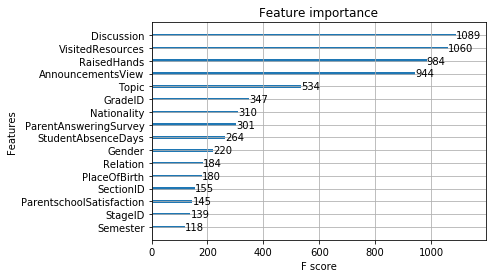

In [31]:
plot_importance(xgb_model)

> **Overvation**: Four behaviour features are more important to succeed in school.